# AirPassengers future prediction


## Time series analysis(TSA)

  -  importing neccesary libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("C:/Users/user/Desktop/kaggle competetion/Air passengers/AirPassengers.csv")

dataset = dataset.rename(columns={"#Passengers":"Passengers"})

In [3]:
dataset.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [4]:
dataset.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


 - set the month column values into datetime fomat

In [5]:
dataset["Month"] = pd.to_datetime(dataset["Month"],infer_datetime_format=True)

indexed_dataset = dataset.set_index("Month")

In [6]:
indexed_dataset

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


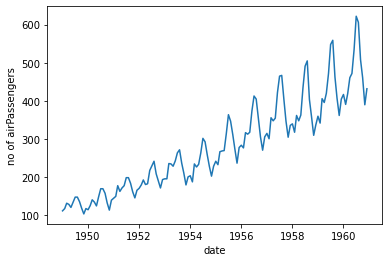

In [7]:
plt.xlabel("date")
plt.ylabel("no of airPassengers")
plt.plot(indexed_dataset)

In [8]:
#let's check whether it is stationary or not
#by determining rolling statistics

rollmean = indexed_dataset.rolling(window=12).mean() #12 months window(group)

rollstd = indexed_dataset.rolling(window=12).std()

print(rollmean,rollstd)

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01  463.333333
1960-09-01  467.083333
1960-10-01  471.583333
1960-11-01  473.916667
1960-12-01  476.166667

[144 rows x 1 columns]             Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01   83.630500
1960-09-01   84.617276
1960-10-01   82.541954
1960-11-01   79.502382
1960-12-01   77.737125

[144 rows x 1 columns]


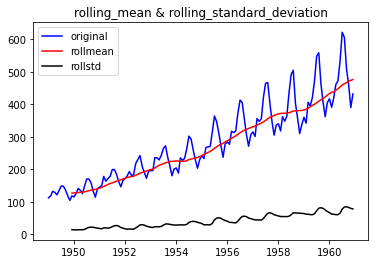

In [9]:
orig = plt.plot(indexed_dataset,color="blue",label="original")
roll_mean = plt.plot(rollmean,color="red",label="rollmean")
roll_std= plt.plot(rollstd,color="black",label="rollstd")
plt.legend(loc="best")
plt.title("rolling_mean & rolling_standard_deviation")
plt.show(block=False)

In [10]:
#perform dickey fuller test

from statsmodels.tsa.stattools import adfuller

dftest = adfuller(indexed_dataset["Passengers"],autolag="AIC")

dftest

(0.8153688792060348,
 0.9918802434376408,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [11]:
dfoutput = pd.Series(dftest[0:4],index = ["test_statistics","p-value","#lag used","no of observations used"])
for key,value in dftest[4].items():
    dfoutput["criticalvalue (%s)"%key] = value
    
dfoutput

test_statistics              0.815369
p-value                      0.991880
#lag used                   13.000000
no of observations used    130.000000
criticalvalue (1%)          -3.481682
criticalvalue (5%)          -2.884042
criticalvalue (10%)         -2.578770
dtype: float64

 - here the goal is to make it stationary  
 - in the above observation pvalue should be low but in this case it is high
 - and also if test_statistics and critical value is relatably same then we can say it is stationary

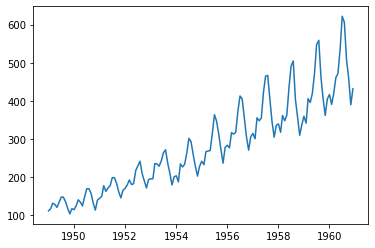

In [12]:
plt.plot(indexed_dataset)

 - now lets change above y-values into log forms
 - its not neccesary to change it to log form only, based on data we can use squareroot, cuberoot, etc., 

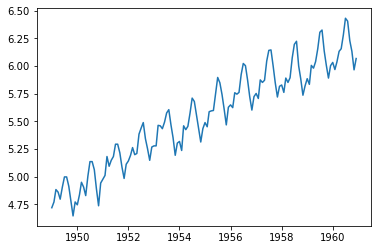

In [13]:
# now lets change above y-values into log forms

in_dataset_logscale = np.log(indexed_dataset)

plt.plot(in_dataset_logscale)

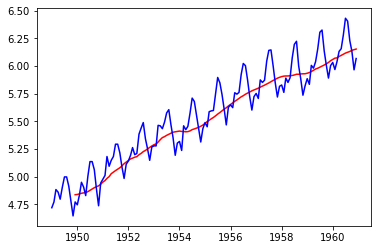

In [14]:
movingavg = in_dataset_logscale.rolling(window=12).mean()
movingstd = in_dataset_logscale.rolling(window=12).std()

a = plt.plot(movingavg,color="red")
#b = plt.plot(movingstd,color="black")
c = plt.plot(in_dataset_logscale,color="blue")
plt.show()

In [15]:
#again the trend is not stationary, we'll perform some more methods to make it stationary

datasetlogscaleminusmovingavg = in_dataset_logscale - movingavg .dropna()
datasetlogscaleminusmovingavg.head()

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN


In [16]:
#remove nan values
datasetlogscaleminusmovingavg = datasetlogscaleminusmovingavg.dropna()


In [17]:
datasetlogscaleminusmovingavg.head()

,Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [18]:
from statsmodels.tsa.stattools import adfuller

def test_stationary(timeseries):
    
    #determine rolling statistics
    movingavg = timeseries.rolling(window=12).mean()
    movingstd  = timeseries.rolling(window=12).std()
    
    #plot graph
    orig = plt.plot(timeseries,color="blue",label = "original")
    rollmean = plt.plot(movingavg,color="red",label = "rollingmean")
    rollstd = plt.plot(movingstd,color = "black",label ="rollingstd")
    plt.legend(loc = "best")
    plt.show(block = False)
    
    #perform dickey fuller test
    
   
    dftest = adfuller(timeseries["Passengers"])
    
    dfoutput = pd.Series(dftest[0:4],index = ["test_statistics","p_value","lags_used","no of observations"])
    for key,value in dftest[4].items():
        dfoutput["critical_value %s: "%key] = value
        
    print(dfoutput)

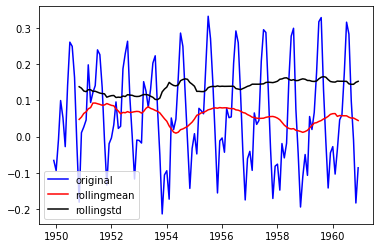

test_statistics          -3.162908
p_value                   0.022235
lags_used                13.000000
no of observations      119.000000
critical_value 1%:       -3.486535
critical_value 5%:       -2.886151
critical_value 10%:      -2.579896
dtype: float64


In [19]:
test_stationary(datasetlogscaleminusmovingavg)

 - as we can see p value is lesser than before
 - and test_statistics and critical value is almost same

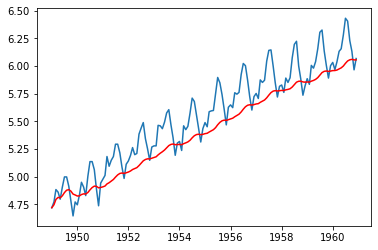

In [20]:
#previously we checked for simple mean
#now we'll check for weighted mean

exponentialdecayweightavg = in_dataset_logscale.ewm(halflife=12).mean()

plt.plot(in_dataset_logscale)
plt.plot(exponentialdecayweightavg,color="red")

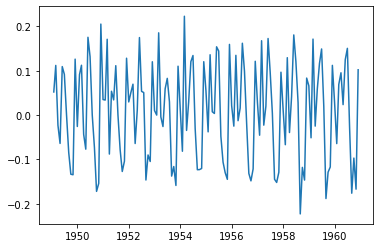

In [21]:
datasetlogdiffshifting = in_dataset_logscale - in_dataset_logscale.shift()
plt.plot(datasetlogdiffshifting)

In [22]:
datasetlogdiffshifting = datasetlogdiffshifting.dropna()

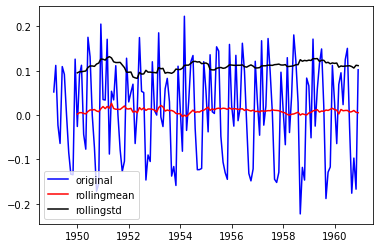

test_statistics          -2.717131
p_value                   0.071121
lags_used                14.000000
no of observations      128.000000
critical_value 1%:       -3.482501
critical_value 5%:       -2.884398
critical_value 10%:      -2.578960
dtype: float64


In [23]:
test_stationary(datasetlogdiffshifting)

 - now lets have a look on trend,seasonal,residual components

In [24]:
in_dataset_logscale

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


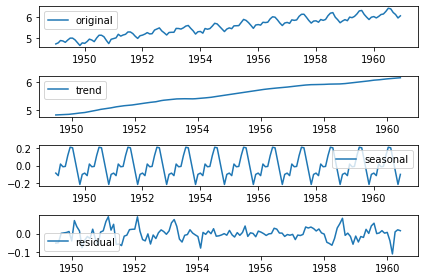

In [25]:
#decomposing the series

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(in_dataset_logscale,model="additive")


trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(in_dataset_logscale,label="original")
plt.legend(loc="best")

plt.subplot(412)
plt.plot(trend,label="trend")
plt.legend(loc="best")

plt.subplot(413)
plt.plot(seasonal,label="seasonal")
plt.legend(loc="best")

plt.subplot(414)
plt.plot(residual,label="residual")
plt.legend(loc="best")
plt.tight_layout()



            Passengers
Month                 
1949-07-01   -0.050884
1949-08-01   -0.048415
1949-09-01    0.001223
1949-10-01    0.003156
1949-11-01    0.005749
...                ...
1960-02-01   -0.038032
1960-03-01   -0.108624
1960-04-01    0.009006
1960-05-01    0.020213
1960-06-01    0.015348

[132 rows x 1 columns]


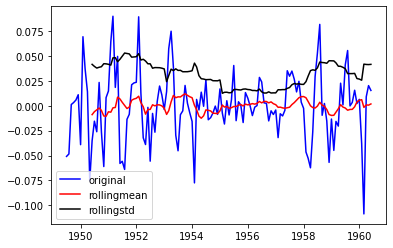

test_statistics        -6.332387e+00
p_value                 2.885059e-08
lags_used               9.000000e+00
no of observations      1.220000e+02
critical_value 1%:     -3.485122e+00
critical_value 5%:     -2.885538e+00
critical_value 10%:    -2.579569e+00
dtype: float64


In [26]:
#residual = residual.rename(index = "Passengers")
#print(residual.name)
decomposedlogdata = residual.dropna()
decomposedlogdata = decomposedlogdata.to_frame().rename(columns = {"resid":"Passengers"})
print(decomposedlogdata)
test_stationary(decomposedlogdata)

In [27]:
# lets find out values of P(auto regressive) and Q(moving average)
# for P we have to plot PACF 
# for Q we have to plot ACF


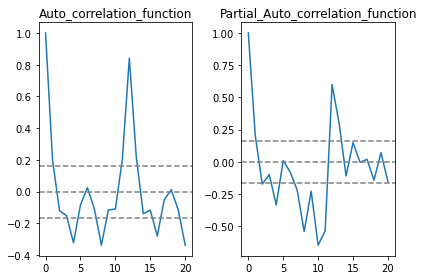

In [28]:
#ACF and PACF plots

from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(datasetlogdiffshifting,nlags=20)
lag_pacf = pacf(datasetlogdiffshifting,nlags=20,method="ols") #ols:ordinary least square

#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle="--",color="grey")
plt.axhline(y=-1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle="--",color="grey")
plt.axhline(y=1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle="--",color="grey")
plt.title("Auto_correlation_function")

            
#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle="--",color="grey")
plt.axhline(y=-1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle="--",color="grey")
plt.axhline(y=1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle="--",color="grey")
plt.title("Partial_Auto_correlation_function")
plt.tight_layout()            


In [29]:
#by below graph we can se the 1st cut is around value 2
#so we conclude p as 2 and q as also 2


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


plotting AR model


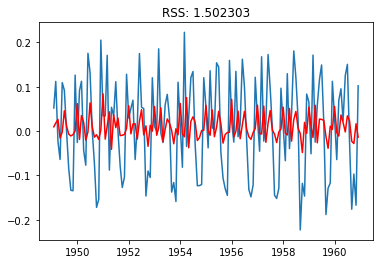

In [30]:
from statsmodels.tsa.arima_model import ARIMA

#AR Model : lets substitute only p value

model = ARIMA(in_dataset_logscale,order = (2,1,0))#order=(p,d,q)
results_AR = model.fit(disp=-1)
plt.plot(datasetlogdiffshifting)
plt.plot(results_AR.fittedvalues,color="red")
plt.title("RSS: %4f"%sum((results_AR.fittedvalues-datasetlogdiffshifting["Passengers"])**2))#RSS:residual sum of squre
print("plotting AR model")


 - the RSS value should be less lets see in ma model

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


plotting MA model


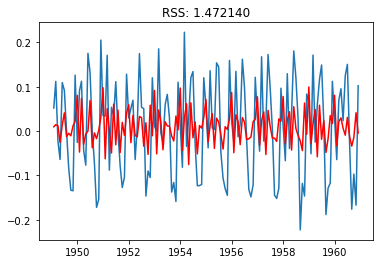

In [31]:
#MA Model : lets substitute only q value

model = ARIMA(in_dataset_logscale,order = (0,1,2))#order=(p,d,q)
results_MA = model.fit(disp=-1)
plt.plot(datasetlogdiffshifting)
plt.plot(results_MA.fittedvalues,color="red")
plt.title("RSS: %4f"%sum((results_MA.fittedvalues-datasetlogdiffshifting["Passengers"])**2))
print("plotting MA model")

 - the RSS value is still more lets see in ARIMA MODE
 
 now we'll substitute both p and q value

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


plotting ARIMA model


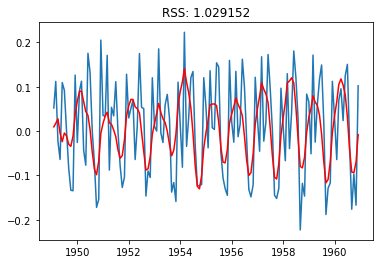

In [32]:
#ARIMA Model 

model = ARIMA(in_dataset_logscale,order = (2,1,2))#order=(p,d,q)
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetlogdiffshifting)
plt.plot(results_ARIMA.fittedvalues,color="red")
plt.title("RSS: %4f"%sum((results_ARIMA.fittedvalues-datasetlogdiffshifting["Passengers"])**2))
print("plotting ARIMA model")

 - conclusion:
 
 RSS_AR:1.5
 RSS_AR:1.4
 RSS_AR:1.02
 
the greater the RSS the bad it becomes 


In [33]:
pred_arima_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
print(pred_arima_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [34]:
#convert to cumulative sum

pred_arima_diff_cumsum = pred_arima_diff.cumsum()
pred_arima_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [35]:
pred_arima_log = pd.Series(in_dataset_logscale["Passengers"].iloc[0], index=in_dataset_logscale.index)
pred_arima_log = pred_arima_log.add(pred_arima_diff_cumsum,fill_value=0)
pred_arima_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

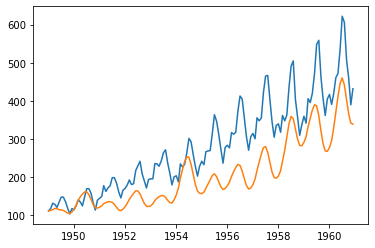

In [36]:
pred_ARIMA = np.exp(pred_arima_log)
plt.plot(indexed_dataset)
plt.plot(pred_ARIMA)

the orage line is what we predict, we can see that only magnitude is changed, the shape is same

 - Above 3 cells(steps) are very important for data transformation

In [37]:
in_dataset_logscale

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


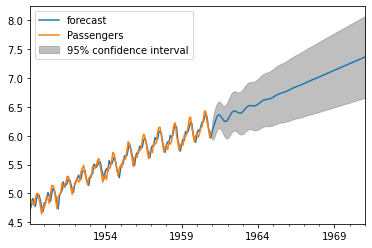

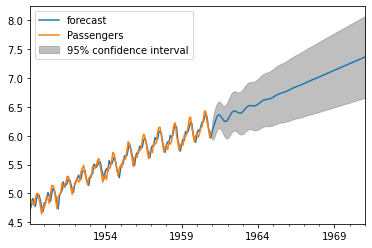

In [38]:
#predicting for future 10 years
results_ARIMA.plot_predict(1,264)#(columns,rows) we already have 144 columns for 10 more years will be 12*10 + 144 =264 


In [39]:
results_ARIMA.forecast(steps=120) #for result in array

(array([6.09553391, 6.152814  , 6.2244296 , 6.29241092, 6.34164703,
        6.36359346, 6.35784669, 6.33139289, 6.29597527, 6.26447704,
        6.24738318, 6.25025165, 6.27275829, 6.30940302, 6.35151479,
        6.38988636, 6.41727358, 6.43011028, 6.42906663, 6.41842463,
        6.40456132, 6.39403595, 6.39183064, 6.40019486, 6.41833674,
        6.44295387, 6.46937412, 6.49293958, 6.51024088, 6.51989   ,
        6.52267544, 6.52112353, 6.51864494, 6.51853659, 6.52311894,
        6.53322332, 6.54812841, 6.56591527, 6.58410275, 6.60036503,
        6.61313227, 6.6219274 , 6.62737746, 6.63093087, 6.63438648,
        6.63937945, 6.64696466, 6.65739802, 6.67015285, 6.6841421 ,
        6.69806583, 6.71077855, 6.72157684, 6.73033935, 6.73749761,
        6.74386328, 6.75037273, 6.75782544, 6.76668633, 6.77699774,
        6.78841269, 6.80032803, 6.81207142, 6.82308705, 6.8330708 ,
        6.84202435, 6.85022254, 6.85811163, 6.86617282, 6.87479093,
        6.88416244, 6.89426325, 6.9048783 , 6.91